In [16]:
import pandas as pd
import glob
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('cleaned.csv')
df.columns = ['DateTime','Energy','Acorn_grouped']
df.shape

(45030000, 3)

Acorn Group:  Affluent


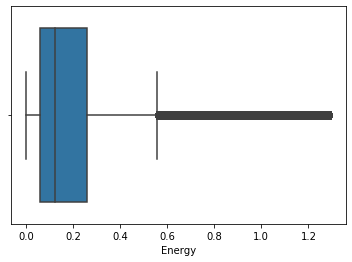

Acorn Group:  Adversity


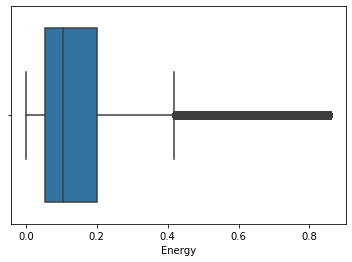

Acorn Group:  Comfortable


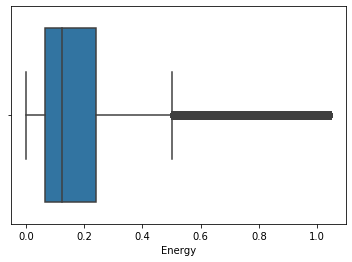

Acorn Group:  ACORN-U


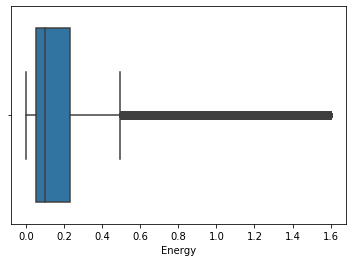

In [4]:
from scipy import stats
import seaborn as sns
def plotBoxPlotwoOutliers(df):
    
    edf = df['Energy'].to_frame()
    z = np.abs(stats.zscore(edf))
    edf = edf[(z < 3).all(axis=1)] 
    a = sns.boxplot(x = edf['Energy'])
    plt.show()
  
for j in (df['Acorn_grouped'].unique()):
    print("Acorn Group: ", j)
    df_grouped = df[df['Acorn_grouped'] == j]
    plotBoxPlotwoOutliers(df_grouped)

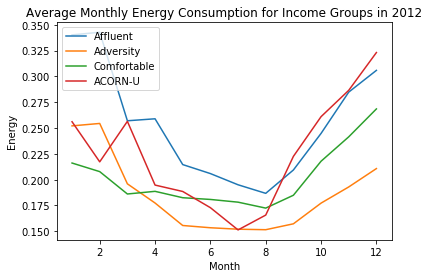

None

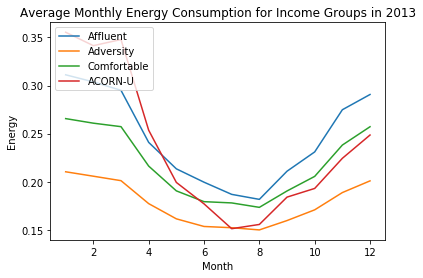

None

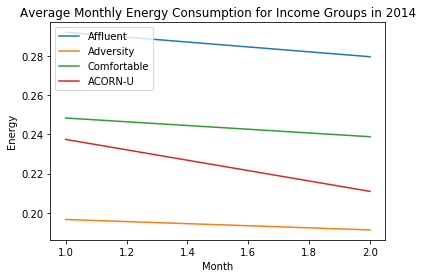

None

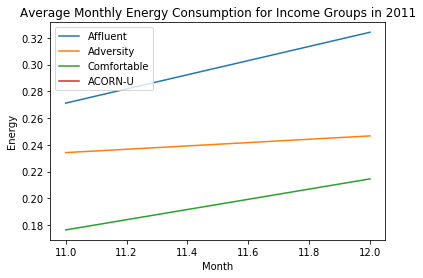

None

In [17]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
%matplotlib inline
def YearlyTrend(df, year, j):
            
            month_index = df['DateTime'].dt.month.unique()
            month_label = np.sort(month_index)
        

            monthly_mean = df['Energy'].groupby(df['DateTime'].dt.month).mean()
            month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
            month2 = [1,2,3,4,5,6,7,8,9,10,11,12]

            plt.plot(month_label, monthly_mean, label = j)
            plt.xlabel("Month")
            plt.ylabel("Energy")

            plt.legend(loc='upper left', ncol = 1)
            t = "Average Monthly Energy Consumption for Income Groups in "+ str(year)
            plt.title(t)
            # plt.show()

for j in (df['DateTime'].dt.year.unique()):
    df_grouped = df[df['DateTime'].dt.year == j]
    for i in (df['Acorn_grouped'].unique()):
        YearlyTrend(df_grouped[df_grouped['Acorn_grouped'] == i], j, i)
    display(plt.show())

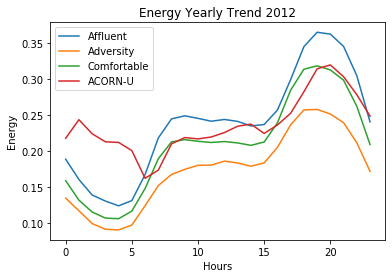

None

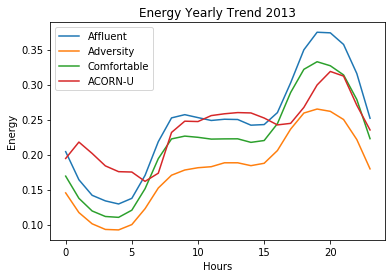

None

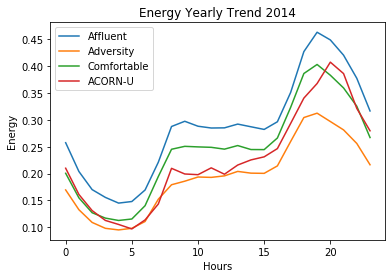

None

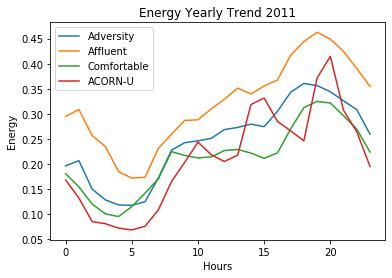

None

In [18]:
def DailyTrend(df, year, j):
    
    Hours = df['DateTime'].dt.hour.unique()
    Hours = np.sort(Hours)
    
    daily_mean = df['Energy'].groupby(df['DateTime'].dt.hour).mean()

    plt.plot(Hours, daily_mean, label = j)
    plt.xlabel("Hours")
    plt.ylabel("Energy")

    plt.legend(loc='upper left', ncol = 1)
    t = "Energy Yearly Trend "+ str(year)
    plt.title(t)

for j in (df['DateTime'].dt.year.unique()):
    df_grouped = df[df['DateTime'].dt.year == j]
    for i in (df_grouped['Acorn_grouped'].unique()):
        DailyTrend(df_grouped[df_grouped['Acorn_grouped'] == i], j, i)
    display(plt.show())

In [21]:
clusterdf=df.pivot_table(values='Energy', index=df['DateTime'].dt.time, columns=df['DateTime'].dt.dayofyear, aggfunc=np.sum, fill_value=0)


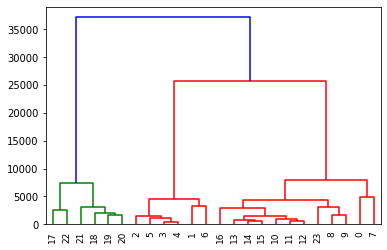

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(clusterdf.iloc[:,0:365], 'ward')
dendrogram(
    Z,
    show_leaf_counts = False,
    p = 12,
    leaf_rotation = 90,
    leaf_font_size = 9,
    show_contracted = True
)
plt.show()

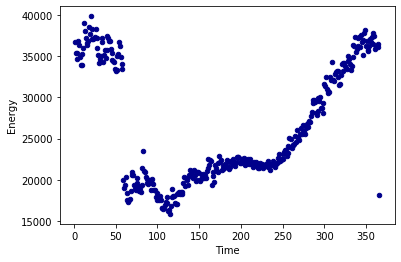

In [27]:
df['Time'] = df['DateTime'].dt.dayofyear
b = df.groupby('Time').sum()

b.index.name = 'Time'
b.reset_index(inplace=True)
b.plot.scatter(x='Time', y='Energy', c='DarkBlue')
# plt.show()

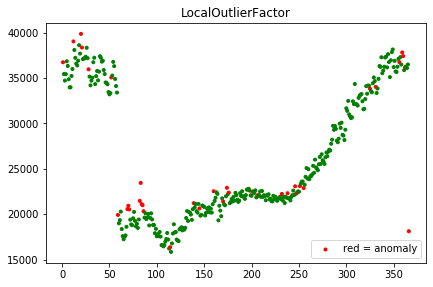

In [41]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats

model = LocalOutlierFactor(n_neighbors=20, metric='minkowski',contamination=0.1)
model.fit_predict(clusterdf.T)
scores_pred = model.negative_outlier_factor_
threshold = stats.scoreatpercentile(scores_pred, 10) #assuming 10% for outlier fraction
labels = [('anomaly' if x<threshold else 'normal') for x in scores_pred]

fig = plt.figure(figsize=(15,15))
def plot_model(labels, alg_name):
    ax = fig.add_subplot(3,2,1) 
    color_code = {'anomaly':'red', 'normal':'green'}
    colors = [color_code[x] for x in labels]

    ax.scatter(b['Time'], b['Energy'], color=colors, marker='.', label='red = anomaly')
    ax.legend(loc="lower right")

    leg = plt.gca().get_legend()
    leg.legendHandles[0].set_color('red')

    ax.set_title(alg_name)

plot_model(labels, 'LocalOutlierFactor')

In [23]:
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans 
# from sklearn.preprocessing import LabelEncoder
# df['DateTime'] = pd.to_datetime(df['DateTime'])
# df['Acorn_Encoded'] = LabelEncoder().fit_transform(df['Acorn_grouped'])
# df['Acorn_Encoded'] = df['Acorn_Encoded'].astype(float)
# df.head(10)


# q1 = df[df['DateTime'].dt.month < 3]
# q2 = df[df['DateTime'].dt.month >= 3]
# q2 = q2[q2['DateTime'].dt.month < 6]
# q3 = df[df['DateTime'].dt.month >= 6]
# q3 = q3[q3['DateTime'].dt.month < 9]
# q4 = df[df['DateTime'].dt.month >= 9]

# q1 = q1.drop(['DateTime', 'Acorn_grouped'], axis=1)
# q2 = q2.drop(['DateTime', 'Acorn_grouped'], axis=1)
# q3 = q3.drop(['DateTime', 'Acorn_grouped'], axis=1)
# q4 = q4.drop(['DateTime', 'Acorn_grouped'], axis=1)

# Q1 = np.array(q1)
# # Q1 = StandardScaler().fit_transform(Q1)

# # Kmeans

# kmeans = KMeans(init="k-means++", n_clusters = 2, n_init=12)
# kmeans.fit(Q1)
# print(kmeans.labels_)

# labels = kmeans.labels_
# # q1['Labels'] = kmeans.labels_

# k_means_cluster_centers = kmeans.cluster_centers_
# k_means_cluster_centers


[0 0 0 ... 0 0 0]


array([[0.27840929, 2.44692937],
       [0.20466851, 0.98082423]])